In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [2]:
car_dataset = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [3]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_dataset.shape


(205, 26)

In [5]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car_dataset.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
car_dataset.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
print(car_dataset.fueltype.value_counts())
print(car_dataset.aspiration.value_counts())
print(car_dataset.doornumber.value_counts())
print(car_dataset.carbody.value_counts())
print(car_dataset.drivewheel.value_counts())
print(car_dataset.enginelocation.value_counts())
print(car_dataset.fuelsystem.value_counts())
print(car_dataset.cylindernumber.value_counts())
print(car_dataset.enginetype.value_counts())


fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


In [10]:
#encoding "fueltype" column
car_dataset.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)
#encoding "aspiration" column
car_dataset.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
#encoding "doornumber" column
car_dataset.replace({'doornumber':{'four':1,'two':1}},inplace=True)
#encoding "carbody" column
car_dataset.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)
#encoding "drivewheel" column
car_dataset.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)
#encoding "enginelocation" column
car_dataset.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
#encoding "fuelsystem" column
car_dataset.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':3,'4bbl':4,'mfi':5,'spfi':6}},inplace=True)
#encoding"cylindernumber" column
car_dataset.replace({'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}},inplace=True)
#encoding "enginetype" column
car_dataset.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)


In [11]:
car_dataset.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,1,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,1,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
X = car_dataset.drop(['CarName','price'],axis=1)
Y = car_dataset['price']

In [13]:
print(X)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         0           0           1        4           1   
1         2          3         0           0           1        4           1   
2         3          1         0           0           1        1           1   
3         4          2         0           0           1        0           0   
4         5          2         0           0           1        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         0           0           1        0           1   
201     202         -1         0           1           1        0           1   
202     203         -1         0           0           1        0           1   
203     204         -1         1           1           1        0           1   
204     205         -1         0           1           1        0           1   

     enginelocation  wheelb

In [14]:

print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [18]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [22]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [19]:

LinearRegression()


LinearRegression()

In [23]:
training_data_prediction = lin_reg_model.predict(X_train)


In [24]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9027472016097514


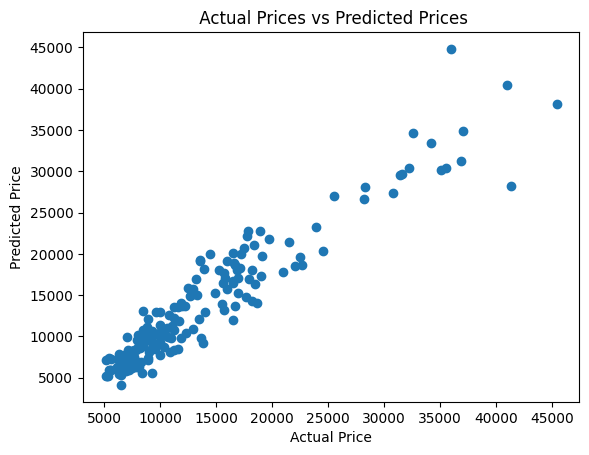

In [25]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [26]:
test_data_prediction = lin_reg_model.predict(X_test)

In [27]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9395402837947702


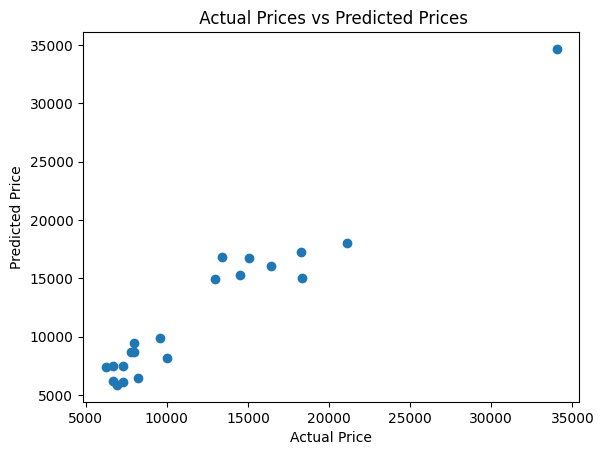

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [29]:
lass_reg_model = Lasso()

In [30]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [31]:
training_data_prediction = lass_reg_model.predict(X_train)


In [32]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9027278059187079


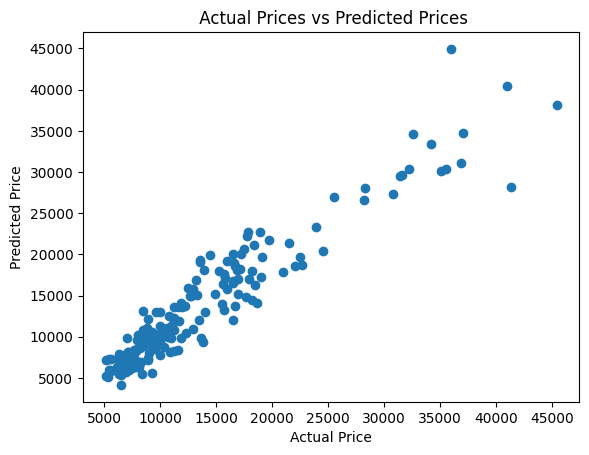

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [34]:
test_data_prediction = lass_reg_model.predict(X_test)

In [35]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.9396516777242746


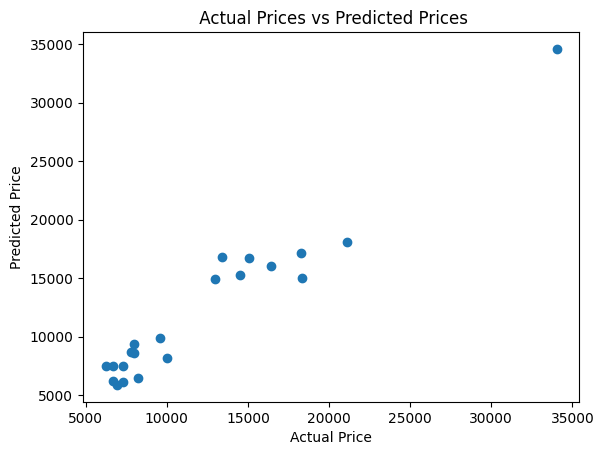

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()